# Analysis of Variance and Linear Models

Video : https://vimeo.com/930516655/4f44843f37?share=copy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
import numpy as np
import seaborn as sns
import sklearn.feature_selection as skl

In [2]:
cars = pd.read_csv('/Users/zanderbonnet/Desktop/GCU/DSC_510/DataSets/cars.csv')
cars.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [3]:
cars.dropna(inplace= True)
cars.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


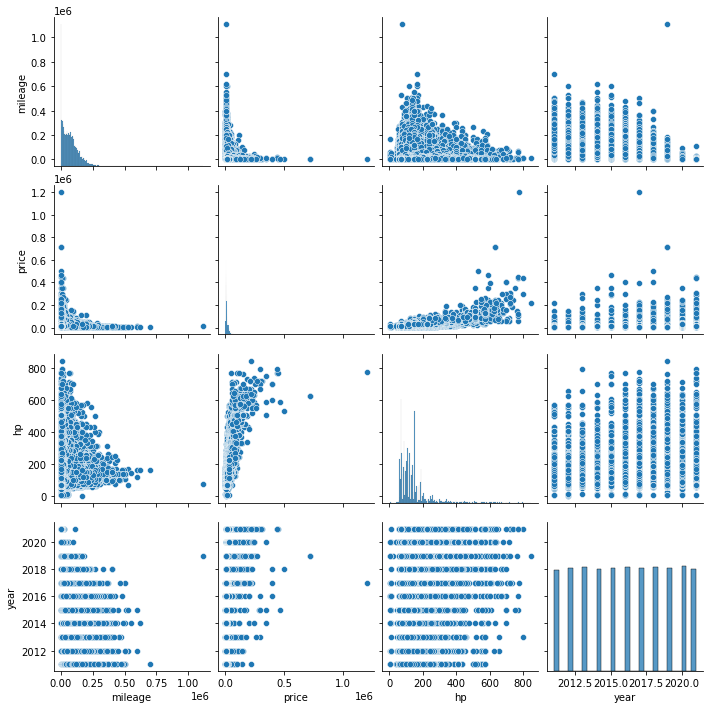

In [4]:
sns.pairplot(cars)
plt.show()

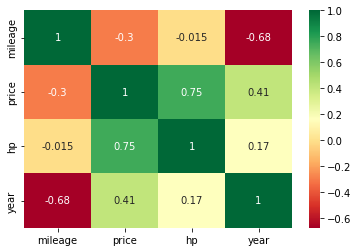

In [5]:
sns.heatmap(cars.corr(), annot = True, cmap="RdYlGn")
plt.show()

# Topic 1

Used 14759.733338355683
Demonstration 34859.888132709486
Employee's car 30439.959713518354
Pre-registered 21134.68822254335
New 66123.76923076923
F_onewayResult(statistic=884.5325347552229, pvalue=0.0)


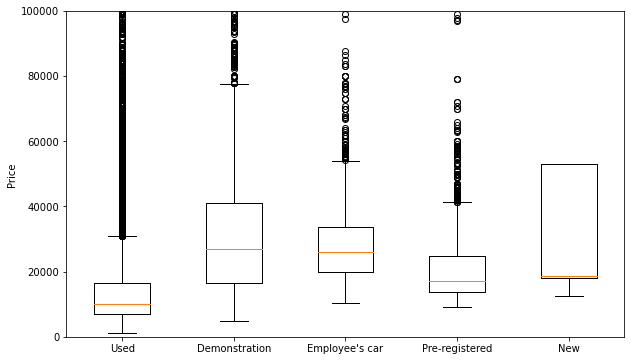

In [6]:
types = cars['offerType'].unique()
cost = []
for t in types:
    cost.append(cars[cars['offerType'] == t]['price'])
    print(t, np.mean(cars[cars['offerType'] == t]['price']))
print(stats.f_oneway(*cost))
plt.figure(figsize= (10,6))
plt.boxplot(cost, labels=types)
plt.ylim(0, 100000)
plt.ylabel('Price')
plt.show()

There is a significant difference in the true means of the price in the various offer types of cars

In [7]:
print('Difference in price by offer type')
makes = cars['make'].unique()
notdif = []
for m in makes:
    c = cars[cars['make'] == m]
    otype = c['offerType'].unique()
    l = []
    for o in otype:
        l.append(c[c['offerType'] == o]['price'])
    if len(l) > 1:
        print(m, 'P-Value:',stats.f_oneway(*l).pvalue)
        if stats.f_oneway(*l).pvalue > .1:
            notdif.append(m)
    else:
        print(m, 'Only', o)


Difference in price by offer type
BMW P-Value: 5.4645469487878734e-64
Volkswagen P-Value: 3.140739373395429e-289
SEAT P-Value: 9.493670562267e-147
Renault P-Value: 4.6458026705846207e-179
Peugeot P-Value: 1.9419792680469057e-66
Toyota P-Value: 3.1493719404887623e-41
Opel P-Value: 2.824444759260457e-263
Mazda P-Value: 1.391069799646565e-70
Ford P-Value: 1.178071089522876e-281
Mercedes-Benz P-Value: 1.9137002302311035e-37
Chevrolet P-Value: 5.202896599338879e-32
Audi P-Value: 3.306817110853567e-112
Fiat P-Value: 6.168598591498945e-205
Kia P-Value: 1.4830559231454102e-69
Dacia P-Value: 7.6688943450952285e-81
MINI P-Value: 2.846609115754667e-15
Hyundai P-Value: 1.9203959970524309e-174
Skoda P-Value: 4.349195806273358e-200
Citroen P-Value: 7.786242912759917e-26
Infiniti Only Used
Suzuki P-Value: 2.3829432778974185e-58
SsangYong P-Value: 2.169724373575228e-07
smart P-Value: 1.641455170464057e-27
Cupra P-Value: 0.011975507573209594
Volvo P-Value: 1.2043484702759885e-50
Jaguar P-Value: 3.27798

In [8]:
nd = cars[cars['make'].isin(notdif)].sort_values('make')
notdif

['Bentley',
 'Dodge',
 'Lamborghini',
 'McLaren',
 'Aston',
 'DS',
 'Ferrari',
 'Alpina',
 'Cadillac']

When analyzing the difference of price of offer type in every car brand it is found that a handful of brands have the same value across all types. This shows that these car brands tend to hold their value across all sales in the dataset.

Diesel 18126.771116089076
Gasoline 15065.131685236769
Electric/Gasoline 29698.1815008726
-/- (Fuel) 15213.545454545454
Electric 23162.860816944023
Electric/Diesel 37605.018867924526
CNG 12602.172413793103
LPG 11396.368
Others 14468.63829787234
Hydrogen 34990.0
Ethanol 3450.0
F_onewayResult(statistic=98.24199443388889, pvalue=1.8423612429045121e-202)


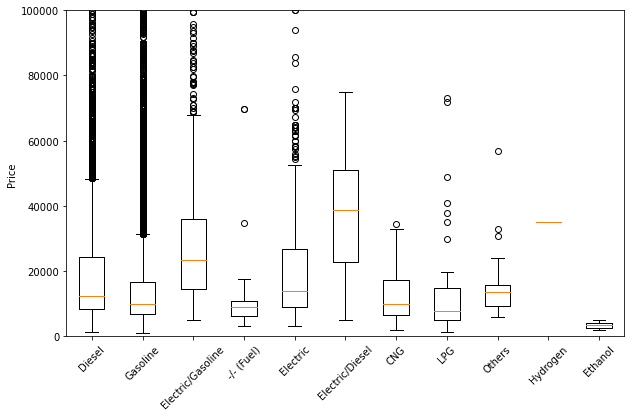

In [9]:
types = cars['fuel'].unique()
cost = []
for t in types:
    cost.append(cars[cars['fuel'] == t]['price'])
    print(t, np.mean(cars[cars['fuel'] == t]['price']))
print(stats.f_oneway(*cost))
plt.figure(figsize= (10,6))
plt.boxplot(cost, labels=types)
plt.xticks(rotation = 45)
plt.ylim(0, 100000)
plt.ylabel('Price')
plt.show()

There is a significant difference in the price of cars based on their fuel type.

Manual 10569.332739450329
Automatic 28158.78352222081
Semi-automatic 8424.982142857143
F_onewayResult(statistic=5302.455493353005, pvalue=0.0)


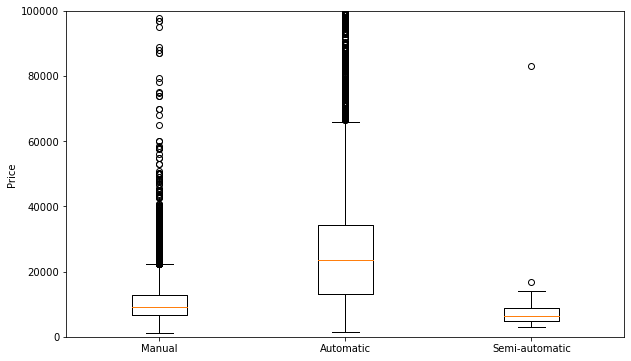

In [10]:
types = cars['gear'].unique()
cost = []
for t in types:
    cost.append(cars[cars['gear'] == t]['price'])
    print(t, np.mean(cars[cars['gear'] == t]['price']))
print(stats.f_oneway(*cost))
plt.figure(figsize= (10,6))
plt.boxplot(cost, labels=types)
plt.ylim(0, 100000)
plt.ylabel('Price')
plt.show()

There is a significant difference in the price of cars based on their gear type.

# Topic 2

In [11]:
mod = sm.ols('price ~ mileage + make + fuel + gear + offerType + hp + year', data = cars).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     1857.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:45:10   Log-Likelihood:            -4.8482e+05
No. Observations:               46071   AIC:                         9.698e+05
Df Residuals:                   45981   BIC:                         9.706e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -1.879e+06   4.33e+04    -43.375      0.000   -1.96e+06   -1.79e+06
make[T.Aixam]                1.387e+04   6518.211      2.127      0.033    1089.790    2.66e+04
make[T.Alfa]                 4947.7639   1585.698      3.120      0.002    1839.772    8055.756
make[T.Alpina]               7740.1407   3169.351      2.442      0.015    1528.163     1.4e+04
make[T.Alpine]               2.817e+04   9108.937      3.092      0.002    1.03e+04     4.6e+04
make[T.Aston]                 8.47e+04   2161.528     39.184      0.000    8.05e+04    8.89e+04
make[T.Audi]                 7820.7205   1388.714      5.632      0.000    5098.820    1.05e+04
make[T.BMW]                  3863.1035   1390.396      2.778      0.005    1137.905    6588.302
make[T.Baic]                 3162.9500   6513.401      0.486      0.627   -9603.417    1.59e+04
make[T.Bentley]              1.258e+05   2963.558     42.434      0.000     1.2e+05    1.32e+05
make[T.Brilliance]           1217.7113   9145.074      0.133      0.894   -1.67e+04    1.91e+04
make[T.Cadillac]            -5041.1869   3673.142     -1.372      0.170   -1.22e+04    2158.229
make[T.Chevrolet]            3121.8028   1503.564      2.076      0.038     174.795    6068.811
make[T.Chrysler]            -6796.3904   4260.024     -1.595      0.111   -1.51e+04    1553.323
make[T.Citroen]              4612.8293   1407.233      3.278      0.001    1854.631    7371.027
make[T.Corvette]              1.28e+04   5392.871      2.374      0.018    2232.763    2.34e+04
make[T.Cupra]                  34.4250   1774.110      0.019      0.985   -3442.857    3511.707
make[T.DFSK]                  855.9873   6514.215      0.131      0.895   -1.19e+04    1.36e+04
make[T.DS]                   9181.1282   2639.472      3.478      0.001    4007.722    1.44e+04
make[T.Dacia]                3607.3937   1417.715      2.545      0.011     828.649    6386.138
make[T.Daihatsu]             7899.3331   3163.356      2.497      0.013    1699.106    1.41e+04
make[T.Dodge]               -1878.8025   2373.761     -0.791      0.429   -6531.411    2773.806
make[T.Estrima]               1.24e+04   6525.245      1.900      0.057    -388.423    2.52e+04
make[T.FISKER]               1.849e+04   9115.057      2.028      0.043     622.387    3.64e+04
make[T.Ferrari]              2.271e+05   3080.543     73.732      0.000    2.21e+05    2.33e+05
make[T.Fiat]                 5404.1558   1393.538      3.878      0.000    2672.799    8135.513
make[T.Ford]                 4073.2980   1383.172      2.945      0.003    1362.260    6784.336
make[T.Honda]                5753.1198   1529.933      3.760      0.000    2754.428    8751.812
make[T.Hyundai]              4295.4599   1391.022      3.088      0.002    1569.036    7021.884
make[T.Infi

Fuel type does not have a significant p-value in the model, so it is not significant in predicting the price.

In [12]:
#eliminate fuel as it is not significant
mod = sm.ols('price ~ mileage + make + gear + offerType + hp + year', data = cars).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     2074.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:45:11   Log-Likelihood:            -4.8498e+05
No. Observations:               46071   AIC:                         9.701e+05
Df Residuals:                   45991   BIC:                         9.708e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -2.034e+06   4.24e+04    -47.953      0.000   -2.12e+06   -1.95e+06
make[T.Aixam]                1.592e+04   6538.555      2.435      0.015    3107.267    2.87e+04
make[T.Alfa]                 5137.7621   1590.528      3.230      0.001    2020.302    8255.223
make[T.Alpina]               7794.3400   3180.068      2.451      0.014    1561.357     1.4e+04
make[T.Alpine]               2.806e+04   9140.645      3.069      0.002    1.01e+04     4.6e+04
make[T.Aston]                8.438e+04   2168.428     38.912      0.000    8.01e+04    8.86e+04
make[T.Audi]                 8329.2819   1392.421      5.982      0.000    5600.115    1.11e+04
make[T.BMW]                  4394.0701   1394.105      3.152      0.002    1661.603    7126.537
make[T.Baic]                 2978.0275   6535.980      0.456      0.649   -9832.596    1.58e+04
make[T.Bentley]              1.256e+05   2973.496     42.246      0.000     1.2e+05    1.31e+05
make[T.Brilliance]           2827.8802   9139.362      0.309      0.757   -1.51e+04    2.07e+04
make[T.Cadillac]            -5262.6347   3685.649     -1.428      0.153   -1.25e+04    1961.296
make[T.Chevrolet]            3414.7576   1507.965      2.264      0.024     459.123    6370.392
make[T.Chrysler]            -6859.0954   4271.381     -1.606      0.108   -1.52e+04    1512.878
make[T.Citroen]              4991.0585   1411.200      3.537      0.000    2225.085    7757.032
make[T.Corvette]             1.255e+04   5411.417      2.319      0.020    1942.728    2.32e+04
make[T.Cupra]                 -67.9905   1778.957     -0.038      0.970   -3554.773    3418.792
make[T.DFSK]                  385.3104   6536.750      0.059      0.953   -1.24e+04    1.32e+04
make[T.DS]                   1.013e+04   2647.072      3.826      0.000    4939.589    1.53e+04
make[T.Dacia]                3883.9169   1420.873      2.733      0.006    1098.983    6668.851
make[T.Daihatsu]             7896.1524   3174.035      2.488      0.013    1674.995    1.41e+04
make[T.Dodge]               -1974.6180   2376.619     -0.831      0.406   -6632.828    2683.592
make[T.Estrima]              1.476e+04   6538.690      2.258      0.024    1948.855    2.76e+04
make[T.FISKER]               2.023e+04   9142.182      2.212      0.027    2307.244    3.81e+04
make[T.Ferrari]              2.268e+05   3090.757     73.377      0.000    2.21e+05    2.33e+05
make[T.Fiat]                 5720.3095   1397.188      4.094      0.000    2981.799    8458.820
make[T.Ford]                 4538.9224   1386.971      3.273      0.001    1820.437    7257.408
make[T.Honda]                5903.1148   1534.675      3.846      0.000    2895.127    8911.103
make[T.Hyundai]              4572.2801   1394.968      3.278      0.001    1838.121    7306.439
make[T.Infi

The gearing of the car is also not significant in the price prediction model so it can be removed.

In [13]:
#eliminate gear as it is not significant
mod = sm.ols('price ~ mileage + make + offerType + hp + year', data = cars).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     2125.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:45:11   Log-Likelihood:            -4.8500e+05
No. Observations:               46071   AIC:                         9.702e+05
Df Residuals:                   45993   BIC:                         9.708e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -2.075e+06   4.19e+04    -49.497      0.000   -2.16e+06   -1.99e+06
make[T.Aixam]                1.691e+04   6539.717      2.586      0.010    4093.459    2.97e+04
make[T.Alfa]                 5333.4781   1590.955      3.352      0.001    2215.182    8451.774
make[T.Alpina]               7844.6411   3181.482      2.466      0.014    1608.887    1.41e+04
make[T.Alpine]               2.761e+04   9144.477      3.019      0.003    9686.849    4.55e+04
make[T.Aston]                8.411e+04   2169.016     38.780      0.000    7.99e+04    8.84e+04
make[T.Audi]                 8666.1287   1392.087      6.225      0.000    5937.617    1.14e+04
make[T.BMW]                  4730.2986   1393.770      3.394      0.001    1998.487    7462.110
make[T.Baic]                 3333.2138   6538.678      0.510      0.610   -9482.696    1.61e+04
make[T.Bentley]              1.254e+05   2974.622     42.154      0.000     1.2e+05    1.31e+05
make[T.Brilliance]           2996.3730   9143.413      0.328      0.743   -1.49e+04    2.09e+04
make[T.Cadillac]            -5161.0732   3687.266     -1.400      0.162   -1.24e+04    2066.025
make[T.Chevrolet]            3590.4311   1508.393      2.380      0.017     633.958    6546.904
make[T.Chrysler]            -6410.1461   4272.734     -1.500      0.134   -1.48e+04    1964.479
make[T.Citroen]              5200.3746   1411.469      3.684      0.000    2433.872    7966.877
make[T.Corvette]              1.18e+04   5412.612      2.180      0.029    1191.586    2.24e+04
make[T.Cupra]                 265.8883   1779.016      0.149      0.881   -3221.011    3752.788
make[T.DFSK]                 1021.6613   6538.947      0.156      0.876   -1.18e+04    1.38e+04
make[T.DS]                   1.047e+04   2647.729      3.955      0.000    5282.318    1.57e+04
make[T.Dacia]                3986.7776   1421.421      2.805      0.005    1200.771    6772.784
make[T.Daihatsu]             8166.9111   3175.177      2.572      0.010    1943.514    1.44e+04
make[T.Dodge]               -1929.9288   2377.672     -0.812      0.417   -6590.204    2730.346
make[T.Estrima]              1.573e+04   6539.948      2.405      0.016    2908.192    2.85e+04
make[T.FISKER]               2.045e+04   9146.206      2.236      0.025    2525.537    3.84e+04
make[T.Ferrari]              2.263e+05   3091.184     73.205      0.000     2.2e+05    2.32e+05
make[T.Fiat]                 5890.4037   1397.569      4.215      0.000    3151.146    8629.661
make[T.Ford]                 4714.9538   1387.330      3.399      0.001    1995.765    7434.143
make[T.Honda]                6145.3326   1534.907      4.004      0.000    3136.891    9153.774
make[T.Hyundai]              4791.3815   1395.185      3.434      0.001    2056.798    7525.965
make[T.Infi

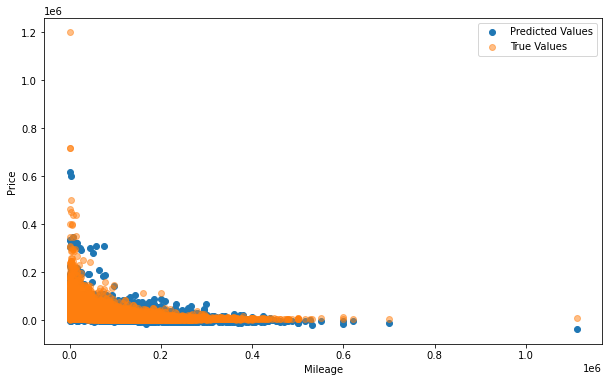

In [14]:
pred = mod.predict(cars)
plt.figure(figsize = (10,6))
plt.scatter(cars['mileage'], pred, label = 'Predicted Values')
plt.scatter(cars['mileage'], cars['price'], label = 'True Values', alpha = .5)
plt.xlabel('Mileage'), plt.ylabel('Price')
plt.legend()
plt.show()

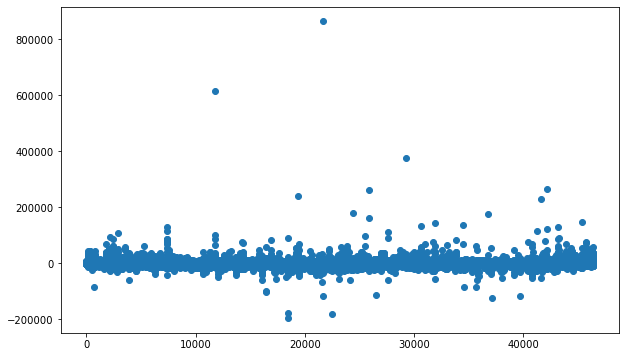

In [15]:
plt.figure(figsize = (10,6))
plt.scatter(mod.resid.index,mod.resid)
plt.show()

The final model is based on the make, mileage, year, hp and offer type.

Make- This is dependent on the make of the vehicle. This makes sense as a significant predicto, because a luxuary car brand is going to cost more then a standard car brand.

mileage -  -0.0483 This means that there is a negative .04 impact on the cars price for every mile that the car has. This makes sense as people are going to pay less for cars with more miles.

year - 1029.0661 There is a positive impact of 1029 for every year that the car is newer. Newer cars tend to be more expensive so this is a way to account for that.

hp - 147.986 There is a possitive 147 impact on the price for every hp that the car has. More powerful cars tend to have a higher price tag.

offer type - This is dependent on the offer type, but used has the largest impact on the price and new has the smallest impact on the price. We would expect this beacue new cars are going to be more expensive then their used counter part.

The final model is significant with a F statistic of 2125 leading to a 0 p-value, and a statistacly significant intercept.

The final model fits the assumptions of random residuals, independint variables, and equal variance of the predictors.

# Topic 3

Assumptions/Limitations of ANOVA

The data must be normally distributed, be free of major outliers, and the variances of the samples must be similar. This limits the amount of data that you can work on using ANOVA. If we are to not meet these assumptions we might misleading and incorrect results. We can use data transformation and outlier removal to attemopt to correct any discrepencies in the data, but this may not always work. The bigest threat to ANOVA is how it is heavily influenced by outliers. Outliers can skew the means very significantly, so ANOVA will give a false positive if the means are skewed dramatically.

Assumptions/Limitations of Linear Regression

Similar to ANOVA the data must be normally distributed, be free of major outliers, and the variances of the samples must be similar. On top of these assumptions it must also have a linear relationship, and the residuals must have a random distrobution. This is the main limitation of linear regression. There are so many assumptions that it requires a perfect dataset. We can try and meet these assumptions by manipulatinfg the data, but somtimes we need to take a nonlinear approach.  

References:

Germany Cars Dataset.(2021). Kaggle [Dataset].  https://www.kaggle.com/datasets/ander289386/cars-germany.

Rogel-Salazar, J. (2023). Statistics and data visualisation with python. CRC Press

https://www.kaggle.com/datasets/ander289386/cars-germany